<center><img src="../../logo.png" alt="Header" style="width: 800px;"/></center>

@Copyright (C): 2010-2022, Shenzhen Yahboom Tech  
@Author: Liusen  
@Date: 2020-02-19 14:10:00  
@LastEditors: Liusen  
@LastEditTime: 2020-02-19 14:10:00   

In [2]:
#1 gray 2 7*7 10*10 3 0-255 256 4 640-63 64-127 
# 3 10 0-63 99 
# 4 count 5 dst = result

import cv2
import numpy as np

img = cv2.imread('image00.jpg',1)
#cv2.imshow('src',img)

imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dst = np.zeros((height,width,3),np.uint8)
for i in range(4,height-4):
    for j in range(4,width-4):
        array1 = np.zeros(8,np.uint8)
        for m in range(-4,4):
            for n in range(-4,4):
                p1 = int(gray[i+m,j+n]/32)
                array1[p1] = array1[p1]+1
        currentMax = array1[0]
        l = 0
        for k in range(0,8):
            if currentMax<array1[k]:
                currentMax = array1[k]
                l = k
        # 简化 均值
        for m in range(-4,4):
            for n in range(-4,4):
                if gray[i+m,j+n]>=(l*32) and gray[i+m,j+n]<=((l+1)*32):
                    (b,g,r) = img[i+m,j+n]
        dst[i,j] = (b,g,r)
# cv2.imshow('dst',dst)
# cv2.waitKey(0)

# 原始图像

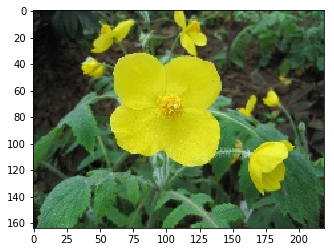

In [3]:
import matplotlib.pyplot as plt

img_bgr2rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr2rgb1)
plt.show()

# 油画特效

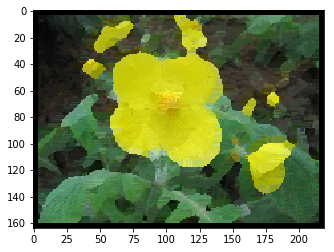

In [4]:
img_bgr2rgb1 = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr2rgb1)
plt.show()